# Building and Training Neural Networks
This is a skills check for 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import zipfile
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

## Project 1: Fashion MNIST
### Use datasets from tf.data.datsets https://keras.io/api/datasets/

In [2]:
# load fashion mnist data from API
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images,test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


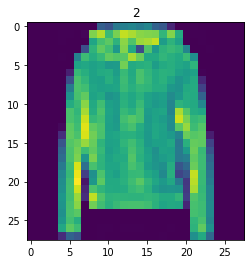

In [3]:
# randomly sample images
index = random.randint(0,len(training_images))
plt.title(training_labels[index])
plt.imshow(training_images[index]);

### Build, compile and train machine learning (ML) models using Tensorflow
### Preprocess data to get it ready for use in a model
### Build sequential models with multiple layers
### Build and train models for multi-class categorization
### Ensure that inputs to a model are in the correct shape
### Ensure that you can match test data to the input shape of a neural network
### Ensure you can match output data of a neural network to a specified input shape of test data

In [4]:
# preprocess data- normalize data
training_images = training_images / 255.0
test_images = test_images / 255.0

def create_model1(training_images,training_labels,test_images,test_labels,learning_rate=1e-3,find_lr=False):

    # build sequential models with multiple layers
    model = tf.keras.Sequential([
        
        # ensure that inputs to a model are the correct shape
        # ensure that you can match test data to the input shape of a neural network
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128,activation="relu"),

        # build and train models for multi-class categorization
        # ensure you can match output data of a neural network to a specified input shape of test data
        tf.keras.layers.Dense(10,activation="softmax")
    ])

    # Create the learning rate callback
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

    # init optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if find_lr == False else tf.keras.optimizers.Adam(learning_rate=learning_rate)
    callbacks = [lr_scheduler] if find_lr else []

    # compile model
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    # Fit the model
    history = model.fit(training_images,
                                training_labels,
                                epochs=20,
                                validation_data=(test_images, test_labels),
                                callbacks=callbacks)
    
    return model, history

In [5]:
model1, history1 = create_model1(training_images,training_labels,test_images,test_labels,find_lr=True)

Epoch 1/20
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4992 - accuracy: 0.8246 - val_loss: 0.4504 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3777 - accuracy: 0.8647 - val_loss: 0.3833 - val_accuracy: 0.8619 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3422 - accuracy: 0.8739 - val_loss: 0.3677 - val_accuracy: 0.8697 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3233 - accuracy: 0.8822 - val_loss: 0.3559 - val_accuracy: 0.8713 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3110 - accuracy: 0.8853 - val_loss: 0.3638 - val_accuracy: 0.8729 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3003 - accuracy: 0.8894 - val_loss: 0.3637 - val_accuracy: 0.8707 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 5

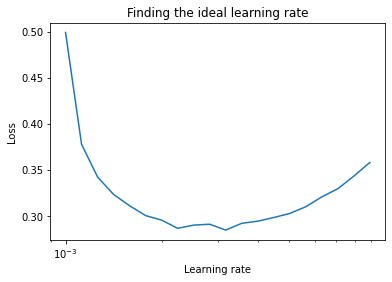

In [6]:
# plot learning rate results
def plot_learning_rate(history,epochs=20):
  lrs = 1e-3 * (10**(np.arange(epochs)/20))
  plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
  plt.xlabel("Learning rate")
  plt.ylabel("Loss")
  plt.title("Finding the ideal learning rate");

plot_learning_rate(history1)

In [7]:
model1, history1 = create_model1(training_images,training_labels,test_images,test_labels,learning_rate=1e-3,find_lr=False)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4953 - accuracy: 0.8256 - val_loss: 0.4161 - val_accuracy: 0.8481
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8641 - val_loss: 0.4076 - val_accuracy: 0.8489
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3409 - accuracy: 0.8754 - val_loss: 0.3985 - val_accuracy: 0.8570
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8847 - val_loss: 0.3669 - val_accuracy: 0.8686
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2998 - accuracy: 0.8895 - val_loss: 0.3703 - val_accuracy: 0.8652
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2833 - accuracy: 0.8956 - val_loss: 0.3580 - val_accuracy: 0.8760
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2715 - accuracy: 0.8990 - val_loss: 0.3369 - val_accuracy:

### Plot loss and accuracy of trained model

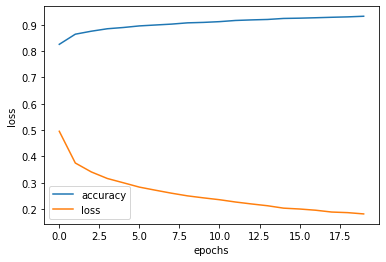

In [8]:
def plot_accuracy_loss(history,flag="train"):
  df = pd.DataFrame(history.history)
  subset = None

  if flag == "train":
    subset = df[['accuracy','loss']]
  else:
    subset = df[['val_accuracy','val_loss']]
  
  subset.plot()
  plt.ylabel("loss")
  plt.xlabel("epochs");

plot_accuracy_loss(history1,flag="train")

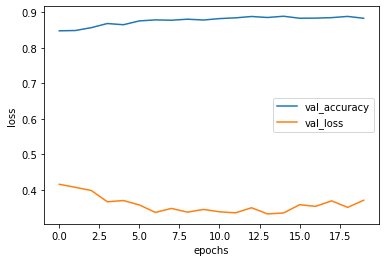

In [9]:
plot_accuracy_loss(history1,flag="valid")

### Use models to predict results

In [10]:
def make_predictions(model,images,labels):
  preds = model.predict(images)
  preds = np.array([np.argmax(pred) for pred in preds])
  acc = np.sum(preds==labels)/len(labels)
  return acc,labels,preds

sample = training_images[0:100]
answers = training_labels[0:100]
acc, labels, preds = make_predictions(model1,sample,answers)

print(f'accuracy: {acc},\n real labels: {labels},\n preds: {preds}')

accuracy: 0.92,
 real labels: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3 6 6 0 8 5
 2 1 6 6 7 9 5 9 2 7 3 0 3 3 3 7 2 2 6 6 8 3 3 5 0 5 5 0 2 0 0 4 1 3 1 6 3
 1 4 4 6 1 9 1 3 5 7 9 7 1 7 9 9 9 3 2 9 3 6 4 1 1 8],
 preds: [9 0 0 3 0 2 7 4 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 2 3 0 2 4 4 5 3 4 6 0 8 5
 2 1 6 6 7 9 5 9 2 7 3 0 3 3 3 7 6 4 6 6 8 3 3 5 0 5 5 0 2 0 6 4 1 3 1 6 3
 1 4 4 0 1 9 1 3 5 7 9 7 1 7 9 7 9 3 2 9 3 6 4 1 1 8]


###**Extension of Fashion MNIST for Transfer Learning, Dropouts, Callbacks, etc**

In [11]:
# Prep data- load fashion mnist data from API
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images,test_labels) = fmnist.load_data()

# resize images
def resize_images(image,TARGET_SIZE=(224,224)):
  return tf.image.resize(
    images=image,
    size=TARGET_SIZE
)
  
# make rank 4 tensor
def rank_tensor(data):
  data = np.expand_dims(data,axis=-1)
  return data.repeat(3,axis=-1)

training_images = rank_tensor(training_images)
test_images = rank_tensor(test_images)

print(training_images.shape,test_images.shape)

(60000, 28, 28, 3) (10000, 28, 28, 3)


### Understand batch loading of data

In [12]:
BATCH_SIZE = 128

train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None
  )

train_generator = train_datagen.flow(
    
    x=training_images,
    y=training_labels,
    batch_size=BATCH_SIZE,
    shuffle=True

)

valid_datagen = ImageDataGenerator(
    rescale=1/255.0,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None
  )

valid_generator = valid_datagen.flow(
    
    x=test_images,
    y=test_labels,
    batch_size=BATCH_SIZE,
    shuffle=True
)

### Identify strategies to prevent overfitting, including augmentation and dropout

In [13]:
def create_model2(train_data,valid_data,epochs=20,find_lr=True,learning_rate=1e-3):

  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128,activation="relu"),
      tf.keras.layers.Dropout(.1),
      tf.keras.layers.Dense(128,activation="relu"),
      tf.keras.layers.Dropout(.1),
      tf.keras.layers.Dense(10,activation="softmax")
  ])

  # Create the learning rate callback
  lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

  # init optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if find_lr == False else tf.keras.optimizers.Adam(learning_rate=learning_rate)
  callbacks = [lr_scheduler] if find_lr else []

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=optimizer,
                metrics=['accuracy'])
  
  history = model.fit(train_data,
                      epochs=epochs,
                      steps_per_epoch=20,
                      validation_data=valid_data,
                      validation_steps=3,
                      callbacks=callbacks)

  return model, history

In [14]:
model2, history2 = create_model2(train_generator,valid_generator,epochs=50)

Epoch 1/50
20/20 [==============================] - 1s 16ms/step - loss: 1.2639 - accuracy: 0.5496 - val_loss: 0.8095 - val_accuracy: 0.7057 - lr: 0.0010
Epoch 2/50
20/20 [==============================] - 0s 11ms/step - loss: 0.8315 - accuracy: 0.6977 - val_loss: 0.7202 - val_accuracy: 0.7344 - lr: 0.0011
Epoch 3/50
20/20 [==============================] - 0s 8ms/step - loss: 0.6955 - accuracy: 0.7375 - val_loss: 0.5722 - val_accuracy: 0.7812 - lr: 0.0013
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.5935 - accuracy: 0.7891 - val_loss: 0.5585 - val_accuracy: 0.8073 - lr: 0.0014
Epoch 5/50
20/20 [==============================] - 0s 8ms/step - loss: 0.6449 - accuracy: 0.7672 - val_loss: 0.5744 - val_accuracy: 0.8099 - lr: 0.0016
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.6095 - accuracy: 0.7820 - val_loss: 0.5379 - val_accuracy: 0.8203 - lr: 0.0018
Epoch 7/50
20/20 [==============================] - 0s 8ms/step - loss: 0.5637 -

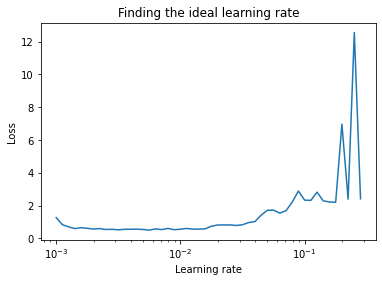

In [15]:
plot_learning_rate(history2,epochs=50)

In [16]:
model2, history2 = create_model2(train_generator,valid_generator,epochs=50,find_lr=False,learning_rate=1e-2)

Epoch 1/50
20/20 [==============================] - 1s 14ms/step - loss: 1.9399 - accuracy: 0.4957 - val_loss: 0.9130 - val_accuracy: 0.6380
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 0.7939 - accuracy: 0.6879 - val_loss: 0.7441 - val_accuracy: 0.7135
Epoch 3/50
20/20 [==============================] - 0s 8ms/step - loss: 0.7377 - accuracy: 0.7270 - val_loss: 0.6918 - val_accuracy: 0.7344
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.6363 - accuracy: 0.7570 - val_loss: 0.6462 - val_accuracy: 0.7708
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.6095 - accuracy: 0.7777 - val_loss: 0.6189 - val_accuracy: 0.7682
Epoch 6/50
20/20 [==============================] - 0s 9ms/step - loss: 0.5920 - accuracy: 0.7824 - val_loss: 0.5111 - val_accuracy: 0.8177
Epoch 7/50
20/20 [==============================] - 0s 10ms/step - loss: 0.6046 - accuracy: 0.7832 - val_loss: 0.5917 - val_accuracy: 0.8047
Epoch 8/50
20/20 [

## Project 2: Classifying Cats and Dogs

### Use pre-trained models (transfer learning)
### Extract features from pre-trained models
### Use callbacks to trigger the end of training cycles
https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/ResNet101

In [63]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_datagen = ImageDataGenerator(rescale=1/255.0)
val_datagen = ImageDataGenerator(rescale=1/255.0)

train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  target_size=IMG_SIZE,
                                                  class_mode='binary')

val_dataset = val_datagen.flow_from_directory(validation_dir,
                                              shuffle=True,
                                              batch_size=BATCH_SIZE,
                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.99:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

In [32]:
def create_model3(train_data,valid_data,epochs=10,learning_rate=1e-4,callback=callback):
  input_shape = (224,224,3)

  base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')
  
  ###### FEATURE EXTRACTION STEP ######
  base_model.trainable = False
  #####################################
  
  inputs = tf.keras.layers.Input(shape=input_shape,name="input_layer")
  x = base_model(inputs,training=False)
  x = tf.keras.layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x = tf.keras.layers.Dense(100,activation="relu",name="dense_layer")(x)
  outputs = tf.keras.layers.Dense(1,activation="sigmoid",name="output_layer")(x)

  model = tf.keras.Model(inputs,outputs)
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=['accuracy'])
  
  history = model.fit(
      train_data,
      epochs=epochs,
      steps_per_epoch=len(train_data),
      validation_data=valid_data,
      validation_steps=int(.15*len(valid_data)),
      callbacks=[callback]
  )

  return model, history

In [33]:
model3, history3 = create_model3(train_dataset,val_dataset)

Epoch 1/10
63/63 [==============================] - 71s 134ms/step - loss: 0.2969 - accuracy: 0.8950 - val_loss: 0.1332 - val_accuracy: 0.9766
Epoch 2/10
63/63 [==============================] - 8s 120ms/step - loss: 0.0960 - accuracy: 0.9710 - val_loss: 0.0809 - val_accuracy: 0.9844
Epoch 3/10
63/63 [==============================] - 8s 120ms/step - loss: 0.0670 - accuracy: 0.9770 - val_loss: 0.0680 - val_accuracy: 0.9844
Epoch 4/10
63/63 [==============================] - 8s 120ms/step - loss: 0.0544 - accuracy: 0.9850 - val_loss: 0.0865 - val_accuracy: 0.9688
Epoch 5/10
63/63 [==============================] - 8s 120ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0564 - val_accuracy: 0.9688
Epoch 6/10
63/63 [==============================] - 8s 119ms/step - loss: 0.0373 - accuracy: 0.9895 - val_loss: 0.0567 - val_accuracy: 0.9844
Epoch 7/10
62/63 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9919
Reached 99.9% accuracy so cancelling training!
63/63 

### Fine tune models from pretrained models


In [60]:
def create_model4(train_data,valid_data,epochs=10,learning_rate=1e-4,callback=callback):

  input_shape = (224,224,3)
  base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')
  
  ###### FINE TUNING STEP ##########################
  base_model.trainable = True
  fine_tune_at = 100

  for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
  ##################################################
  inputs = tf.keras.layers.Input(shape=input_shape,name="input_layer")
  x = base_model(inputs, training=False)
  x = tf.keras.layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x = tf.keras.layers.Dense(100,activation="relu",name="dense_layer")(x)
  outputs = tf.keras.layers.Dense(1,activation="sigmoid",name="output_layer")(x)

  model = tf.keras.Model(inputs,outputs)
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=['accuracy'])
  
  history = model.fit(
      train_data,
      epochs=epochs,
      steps_per_epoch=len(train_data),
      validation_data=valid_data,
      validation_steps=int(.15*len(valid_data)),
      callbacks=[callback]
  )

  return model, history

In [61]:
model4 = create_model4(train_dataset,val_dataset)

Epoch 1/10
63/63 [==============================] - 11s 136ms/step - loss: 0.1410 - accuracy: 0.9470 - val_loss: 0.0516 - val_accuracy: 0.9766
Epoch 2/10
63/63 [==============================] - 8s 122ms/step - loss: 0.0485 - accuracy: 0.9820 - val_loss: 0.1255 - val_accuracy: 0.9531
Epoch 3/10
63/63 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9910
Reached 99.9% accuracy so cancelling training!
63/63 [==============================] - 8s 121ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0258 - val_accuracy: 0.9922
